# DA&ML Basics -  Assignment 3.2

## CRISP-DM Phase 2 - Data Understanding (7 points)

**What is the Purpose of this document?**

* Use this "draft implementation" of "Football database reader" which is already in Jupyter Notebook format.
* You can use this notebook directly in your own implementation.

This notebook works as a guide by downloading the dataset from Kaggle and then it is your task to do your **own initial data analysis** using this database.

## Background information about the data

The dataset used in the assignment is the [European Soccer Database](https://www.kaggle.com/datasets/hugomathien/soccer/data) from Kaggle.com. The database has been created using web crawling scripts from the following websites:
1. [football-data.mx-api.enetscores.com](http://football-data.mx-api.enetscores.com/) : results, lineups, team information and events
2. [www.football-data.co.uk](http://www.football-data.co.uk/) : betting odds
3. [sofifa.com](http://sofifa.com/) : player and team attributes from EA Sports FIFA games

The data in the database includes:
* +25000 matches
* +10000 players
* 11 European football leagues
* From the seasons 2008-2016
* The source of the player and team attributes has been the sofifa website of the "EA Sports FIFA" video games.
* Match lineups with positions
* Betting odds from 10 different betting service providers
* Match metadata, i.e. match scorecard entries (goal types, possession, corners, cards, etc.) for over 10,000 matches.


## Loading Database data

The data is in a **sqlite** database. The database is built from 7 different tables:

In [3]:
import os
import sqlite3 as sql
import pandas as pd

sqlite_file = os.path.join(os.getcwd(), "database.sqlite")

if not os.path.exists(sqlite_file):
    raise FileNotFoundError(f"{sqlite_file} not found in the current directory.")

print("Using SQLite DB file:", sqlite_file)

con = sql.connect(sqlite_file)

df_tables = pd.read_sql_query("""
SELECT name
FROM sqlite_schema
WHERE type='table' AND name NOT LIKE 'sqlite_%';
""", con)

print("Tables in the SQLite DB:")
print(df_tables)

tables = df_tables["name"].tolist()

dfs = {}
for t in tables:
    dfs[t] = pd.read_sql_query(f"SELECT * FROM {t}", con)
    print(f"Loaded table '{t}' with shape:", dfs[t].shape)

# Example: show the first 5 rows from the Country table
print("\nCountry sample:")
print(dfs["Country"].head())


Using SQLite DB file: C:\Users\Kylmä Sami\Desktop\Data-Analysis and Machine Learning Basics TTC8020-3011\da-ml-basics-assignments-in-autumn-2025\assignments3\database.sqlite
Tables in the SQLite DB:
                name
0  Player_Attributes
1             Player
2              Match
3             League
4            Country
5               Team
6    Team_Attributes
Loaded table 'Player_Attributes' with shape: (183978, 42)
Loaded table 'Player' with shape: (11060, 7)
Loaded table 'Match' with shape: (25979, 115)
Loaded table 'League' with shape: (11, 3)
Loaded table 'Country' with shape: (11, 2)
Loaded table 'Team' with shape: (299, 5)
Loaded table 'Team_Attributes' with shape: (1458, 25)

Country sample:
      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy


## Tables in the Database

### Country

The `Country` table contains 11 rows of data. The table has only two columns: `id` and `name`.

In [6]:
# Content of the Country table
sql_query = '''
SELECT
*
FROM
Country;
'''
df_country = pd.read_sql_query(sql_query, con)
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### League

In addition to the `id` and `name` columns, the `League` table also contains the `country_id`.

In [8]:
# League table contents
sql_query = '''
SELECT
*
FROM
League;
'''
df_league = pd.read_sql_query(sql_query, con)
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### Match

The `Match` table is the largest of the tables in terms of rows. The table contains: `country_id`, `league_id`, `match_api_id`, `home_team_api_id`, `away_team_api_id` and home and away player's id values for 11 players per team.

* country id number
* league id number
* match api id number
* home and away team id numbers
* home and away team player id numbers
* home and away team player positions in X and Y coordinates
* match metadata for goals, shots, fouls, cards, corners and possession
* betting odds (1,X,2) from ten betting providers

In [10]:
# Showing Match table content
sql_query = '''
SELECT
*
FROM
Match;
'''
df_match = pd.read_sql_query(sql_query, con)
df_match.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    id                25979 non-null  int64  
 1    country_id        25979 non-null  int64  
 2    league_id         25979 non-null  int64  
 3    season            25979 non-null  object 
 4    stage             25979 non-null  int64  
 5    date              25979 non-null  object 
 6    match_api_id      25979 non-null  int64  
 7    home_team_api_id  25979 non-null  int64  
 8    away_team_api_id  25979 non-null  int64  
 9    home_team_goal    25979 non-null  int64  
 10   away_team_goal    25979 non-null  int64  
 11   home_player_X1    24158 non-null  float64
 12   home_player_X2    24158 non-null  float64
 13   home_player_X3    24147 non-null  float64
 14   home_player_X4    24147 non-null  float64
 15   home_player_X5    24147 non-null  float64
 16   home_player_X6    24

#### Sample data from the Match table

Let's look a small printout of what the data looks like.

In [12]:
df_match.sample(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
15487,15488,13274,13274,2015/2016,17,2015-12-18 00:00:00,1983416,8277,8611,5,...,NaN,1.40,5.20,7.00,NaN,NaN,NaN,NaN,NaN,NaN
12274,12275,10257,10257,2013/2014,22,2014-02-01 00:00:00,1536730,8529,8535,1,...,2.30,3.30,3.30,2.38,NaN,NaN,NaN,NaN,NaN,NaN
18545,18546,17642,17642,2011/2012,30,2012-05-12 00:00:00,1043062,10211,2033,1,...,2.80,2.62,3.25,2.88,2.50,3.2,2.65,2.50,3.20,2.62
19522,19523,17642,17642,2015/2016,23,2016-02-21 00:00:00,2016007,9807,158085,0,...,NaN,2.30,3.20,3.30,NaN,NaN,NaN,NaN,NaN,NaN
14775,14776,13274,13274,2012/2013,6,2012-09-23 00:00:00,1222763,8640,10235,3,...,6.25,1.45,4.75,7.00,1.57,4.0,6.50,1.44,4.33,6.00


#### Statistical analysis of the Match table

Let's analyze basic statistics from the `Match` table

In [14]:
print(df_match[['home_team_goal', 'away_team_goal']].describe())

       home_team_goal  away_team_goal
count    25979.000000    25979.000000
mean         1.544594        1.160938
std          1.297158        1.142110
min          0.000000        0.000000
25%          1.000000        0.000000
50%          1.000000        1.000000
75%          2.000000        2.000000
max         10.000000        9.000000


#### Info on the dataframe created from the Match table

Let's look at the data types of the columns and missing values in the Match table.

In [16]:
print(df_match.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None


#### Counting missing values in the Match table

Let's count the missing number of values.
Then print missing values and their percentage


In [18]:
missing_values = df_match.isnull().sum()
missing_percent = (missing_values / len(df_match)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})

print("Missing values per column:")
print(missing_data[missing_data['Missing Values'] > 0])

Missing values per column:
                Missing Values  Percentage
home_player_X1            1821    7.009508
home_player_X2            1821    7.009508
home_player_X3            1832    7.051850
home_player_X4            1832    7.051850
home_player_X5            1832    7.051850
...                        ...         ...
GBD                      11817   45.486739
GBA                      11817   45.486739
BSH                      11818   45.490589
BSD                      11818   45.490589
BSA                      11818   45.490589

[104 rows x 2 columns]


### Player

There are 7 columns in the `Player` table. The columns include:

* player's API ID number
* player's name
* birthday
* height
* weight

In [20]:
sql_query = '''
SELECT
*
FROM
Player;
'''
df_player = pd.read_sql_query(sql_query, con)
df_player.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


#### Player table data sample

In [22]:
df_player.sample(5)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
10859,10875,37845,Xisco,164471,1986-06-26 00:00:00,187.96,168
4093,4097,20125,Hajime Hosogai,181106,1986-06-10 00:00:00,177.80,150
6540,6550,49866,Manuel Iturra,176903,1984-06-23 00:00:00,175.26,161
8023,8035,291932,Nir Bitton,206317,1991-10-30 00:00:00,193.04,181
8569,8583,535600,Petros,222709,1989-05-29 00:00:00,180.34,172


### Player_Attributes

The `Player_Attributes` table contains a large list of player attributes in numerical form. The better the value of the attribute, the more likely the player is to succeed in situations requiring the attribute.

| Column | Explanation |
| ------ | ------- |
| overall_rating | overall rating |
| potential | potential |
| preferred_foot | player's footwork |
| attacking_work_rate | player's attack class |
| defensive_work_rate | player's defense class |
| crossing | centering |
| finishing | finishing |
| heading_accuracy | head game/heading |
| short_passing | success in short passes |
| volleys | success in direct kicks from the air |
| dribbling | ball control when moving at high speed |
| curve | potential amount of spin in shots and crosses, the higher the more spin |
| free_kick_accuracy | free kick accuracy, potential to shoot over the wall and hit the goal |
| long_passing | long passes, potential to succeed in long passes |
| ball_control | ball control |
| acceleration | player's ability to accelerate to their maximum speed |
| sprint_speed | player's maximum speed |
| agility | player's agility, player's potential to turn faster and probability of attempting phenomenal headers, volleys or scissor kicks |
| reactions | ability to react to unexpected situations |
| balance | player's balance, the higher the less the player falls and stumbles |
| shot_power | shooting power |
| jumping | jumping power in main game situations, the higher the probability of winning main game situations |
| stamina | player's stamina |
| strength | player's probability of winning in situations requiring physical strength |
| long_shots | long shots, shots from outside the goalkeeper's area |
| aggression | aggressiveness/challenging, probability of winning in 1-1 situations |
| interceptions | potential to intercept passes |
| positioning | positioning, player positions on the field to play |
| vision | eye for the game, ability to play more accurately/better and create better chances for the running team |
| penalties | player's ability to avoid penalties (play cleaner) |
| marking | player's ability to "mark" the opponent's "most dangerous" players when defending |
| standing_tackle | potential to steal the ball |
| sliding_tackle | probability of succeeding in clean sliding tackles (ball hit first) |
| gk_diving | goalkeeper dive blocking |
| gk_handling | goalkeeper ball handling |
| gk_kicking | goalkeeper shooting/goal kicks |
| gk_positioning | goalkeeper positioning on the field/on the goal |
| gk_reflexes | goalkeeper reflexes in blocking situations |

Let's show player_Attributes table content.

In [24]:
sql_query = '''
SELECT
*
FROM
Player_Attributes;
'''
df_player_att = pd.read_sql_query(sql_query, con)
df_player_att.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

#### Player_attributes table data sample

And let's show Player_Attributes table content.

In [26]:
df_player_att.sample(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
48149,48150,206655,50661,2013-06-14 00:00:00,75.0,83.0,right,medium,medium,68.0,...,68.0,70.0,23.0,36.0,36.0,13.0,13.0,10.0,8.0,10.0
30245,30246,115888,36029,2008-08-30 00:00:00,72.0,74.0,right,medium,medium,22.0,...,40.0,64.0,22.0,22.0,9.0,77.0,66.0,59.0,73.0,78.0
155319,155320,195059,41058,2013-02-15 00:00:00,62.0,64.0,left,medium,high,67.0,...,46.0,72.0,54.0,68.0,62.0,14.0,12.0,14.0,14.0,15.0
121028,121029,226686,531014,2015-09-21 00:00:00,63.0,75.0,right,medium,medium,39.0,...,55.0,46.0,54.0,66.0,63.0,15.0,7.0,11.0,14.0,9.0
108185,108186,183362,94328,2012-08-31 00:00:00,69.0,74.0,left,medium,medium,50.0,...,64.0,53.0,68.0,73.0,67.0,10.0,8.0,8.0,14.0,7.0


### Team

The `Team` table contains:

* team name
* team abbreviation

In [28]:
sql_query = '''
SELECT
*
FROM
Team;
'''
df_team = pd.read_sql_query(sql_query, con)
df_team.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


Let's show `Team` table data sample.

In [30]:
df_team.sample(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
173,26564,9761,1904.0,NAC Breda,NAC
253,43037,8371,479.0,CA Osasuna,OSA
143,20532,8540,1843.0,Palermo,PAL
81,10312,4170,111376.0,US Boulogne Cote D'Opale,BOU
259,43043,8696,456.0,Racing Santander,SAN


### Team_Attributes

The `Team_Attributes` table contains partly numeric and partly text-type information. Text-type information is divided into categories based on different properties. The columns in the table and their explanations are:

| Column | Explanation | Data type |
| ------ | ------- | ---------- |
| buildUpPlaySpeed | the speed of building the game, the higher the value, the faster the attacks are created. A higher value also exposes the run to possible counterattacks | value |
| buildUpPlaySpeedClass | the speed of building the game | class |
| buildUpPlayDribbling | building a game by passing, the higher the value, the more the game is built from the individual player's passing | value |
| buildUpPlayDribblingClass | building a game by passing | class |
| buildUpPlayPassing | building a game by passing, the higher the value, the more the player builds their game by passing | value |
| buildUpPlayPassingClass | building a game by passing | class |
| buildUpPlayPositioningClass | building a game by positioning players | class |
| chanceCreationPassing | building situations by passing | value |
| chanceCreationPassingClass | building situations by passing | class |
| chanceCreationCrossing | building situations by centering | value |
| chanceCreationCrossingClass | building situations by centering | class |
| chanceCreationShooting | building situations by shooting | value |
| chanceCreationShootingClass | creating chances by triggering | class |
| chanceCreationPositioningClass | creating chances by positioning players | class |
| defencePressure | pressuring the defense, scoring | value |
| defencePressureClass |defense pressure, aggression | class |
| defenceAggression | defensive aggression, aggression, tackling and physical challenge when defending the ball | value |
| defenceAggressionClass | defensive aggression | class |
| defenceTeamWidth | team spread on the field, the higher the value, the wider the team is spread. A more spread out team leaves "gaps" in the midfield | value |
| defenceTeamWidthClass | team spread on the field | class |
| defenceDefenderLineClass | team's defensive line height, the higher the defense supports the attack, but is also more vulnerable to through runs | class |

In [32]:
# Team table content
sql_query = '''
SELECT
*
FROM
Team_Attributes;
'''
df_team_att = pd.read_sql_query(sql_query, con)
df_team_att.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

#### Sample data from the Team_Attributes table

In [34]:
df_team_att.sample(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
401,402,10020,7842,2014-09-19 00:00:00,66,Balanced,56.0,Normal,52,Mixed,...,39,Normal,Organised,46,Medium,49,Press,55,Normal,Cover
1233,1234,680,9997,2010-02-22 00:00:00,50,Balanced,NaN,Little,50,Mixed,...,50,Normal,Organised,50,Medium,50,Press,50,Normal,Cover
577,578,100879,10278,2013-09-20 00:00:00,53,Balanced,NaN,Little,54,Mixed,...,60,Normal,Organised,50,Medium,52,Press,58,Normal,Cover
1364,1365,110913,8475,2014-09-19 00:00:00,38,Balanced,45.0,Normal,39,Mixed,...,39,Normal,Organised,25,Deep,37,Press,35,Normal,Cover
1243,1244,1806,10194,2011-02-22 00:00:00,50,Balanced,NaN,Little,80,Long,...,35,Normal,Organised,25,Deep,65,Press,50,Normal,Cover


### Visualizations
Let's create histograms and boxplots to illustrate the distribution of goals and the significance of home advantage.

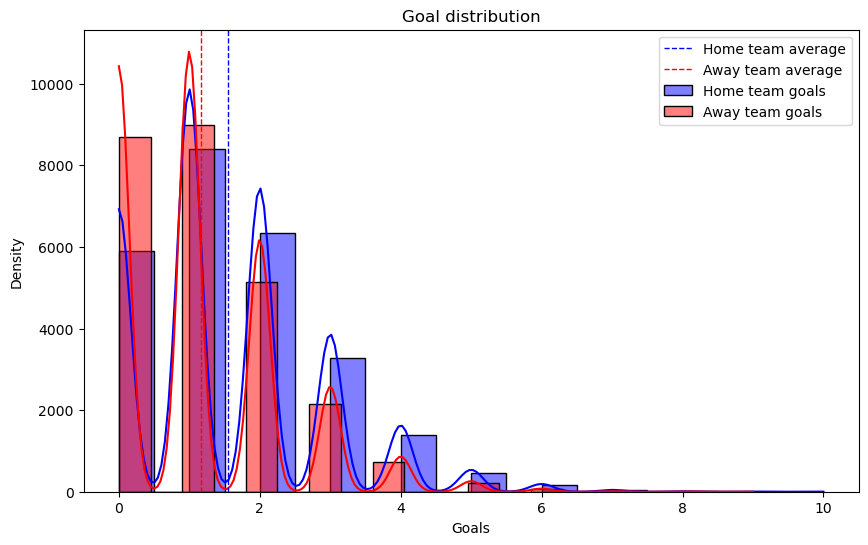

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of goal totals
plt.figure(figsize=(10, 6))
sns.histplot(df_match['home_team_goal'], bins=20, kde=True, color='blue', label='Home team goals', alpha=0.5)
sns.histplot(df_match['away_team_goal'], bins=20, kde=True, color='red', label='Away team goals', alpha=0.5)
plt.axvline(df_match['home_team_goal'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Home team average')
plt.axvline(df_match['away_team_goal'].mean(), color='red', linestyle='dashed', linewidth=1, label='Away team average')
plt.title('Goal distribution')
plt.xlabel('Goals')
plt.ylabel('Density')
plt.legend()
plt.show()

Number of goals.

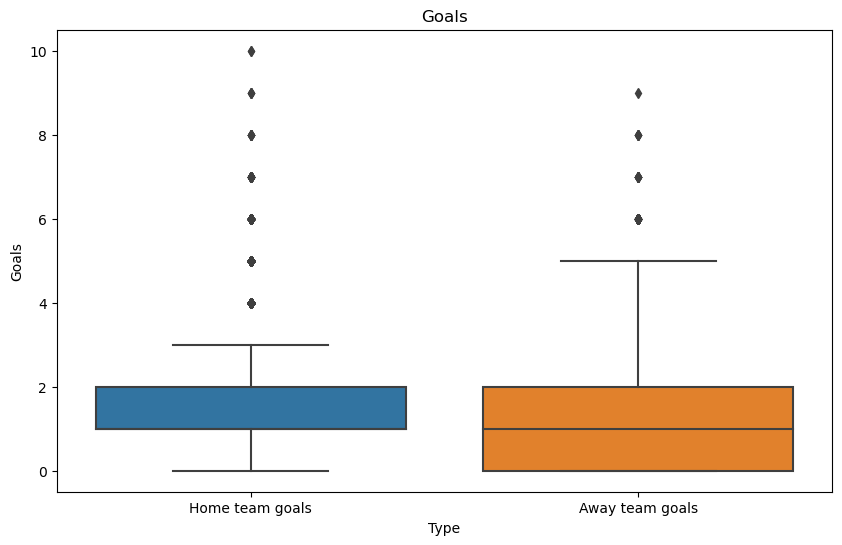

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_match[['home_team_goal', 'away_team_goal']])
plt.title('Goals')
plt.xlabel('Type')
plt.ylabel('Goals')
plt.xticks([0, 1], ['Home team goals', 'Away team goals'])
plt.show()

Let's search information on teams and countries.

In [40]:
team_info_query = '''
    SELECT 
        Team.team_api_id, Team.team_long_name, League.name as league_name
    FROM 
        Team
    JOIN 
        Match ON Team.team_api_id = Match.home_team_api_id
    JOIN 
        League ON Match.league_id = League.id
    GROUP BY 
        Team.team_api_id;
    '''
team_info = pd.read_sql_query(team_info_query, con)

Let's calculate average goal totals by team.

In [42]:

team_goals_home = df_match.groupby('home_team_api_id')['home_team_goal'].mean().reset_index()
team_goals_away = df_match.groupby('away_team_api_id')['away_team_goal'].mean().reset_index()
team_goals_home.columns = ['team_api_id', 'average_home_goals']
team_goals_away.columns = ['team_api_id', 'average_away_goals']

# Check that there are no missing values in the DataFrames to be combined
print(f"Null home goals values : {team_goals_home.isna().sum()}")
print(f"Null away goals values : {team_goals_away.isna().sum()}")

print(team_goals_home.sample(5))
print(team_goals_away.sample(5))

Null home goals values : team_api_id           0
average_home_goals    0
dtype: int64
Null away goals values : team_api_id           0
average_away_goals    0
dtype: int64
     team_api_id  average_home_goals
8           4064            0.866667
278        10238            1.088710
89          8457            1.157895
24          7788            1.313725
176         9776            1.058824
     team_api_id  average_away_goals
210         9864            1.019737
231         9911            0.911765
275        10229            1.566176
106         8529            0.969697
263        10194            0.776316


In [43]:
print(team_goals_home.describe())
print(team_goals_away.describe())

         team_api_id  average_home_goals
count     299.000000          299.000000
mean    12340.521739            1.411247
std     25940.411135            0.409244
min      1601.000000            0.588235
25%      8349.000000            1.151462
50%      8655.000000            1.315789
75%      9886.500000            1.606618
max    274581.000000            3.322368
         team_api_id  average_away_goals
count     299.000000          299.000000
mean    12340.521739            1.055441
std     25940.411135            0.323370
min      1601.000000            0.263158
25%      8349.000000            0.847661
50%      8655.000000            1.000000
75%      9886.500000            1.186049
max    274581.000000            2.328947


Let's combine home and away team goal averages and then merge goal averages with team information.

In [45]:
# Combine home and away team goal averages
team_goals = pd.merge(team_goals_home, team_goals_away, on='team_api_id')

# Merge goal averages and team information
team_goals = pd.merge(team_goals, team_info, on='team_api_id')

league_names = team_goals['league_name'].unique()
league_names

array(['Poland Ekstraklasa', 'Belgium Jupiler League',
       'Portugal Liga ZON Sagres', 'France Ligue 1', 'Italy Serie A',
       'Netherlands Eredivisie', 'Switzerland Super League',
       'Spain LIGA BBVA', 'Scotland Premier League',
       'Germany 1. Bundesliga', 'England Premier League'], dtype=object)

Let's
 visualize team-specific average goals by country in Scotland and Germany.

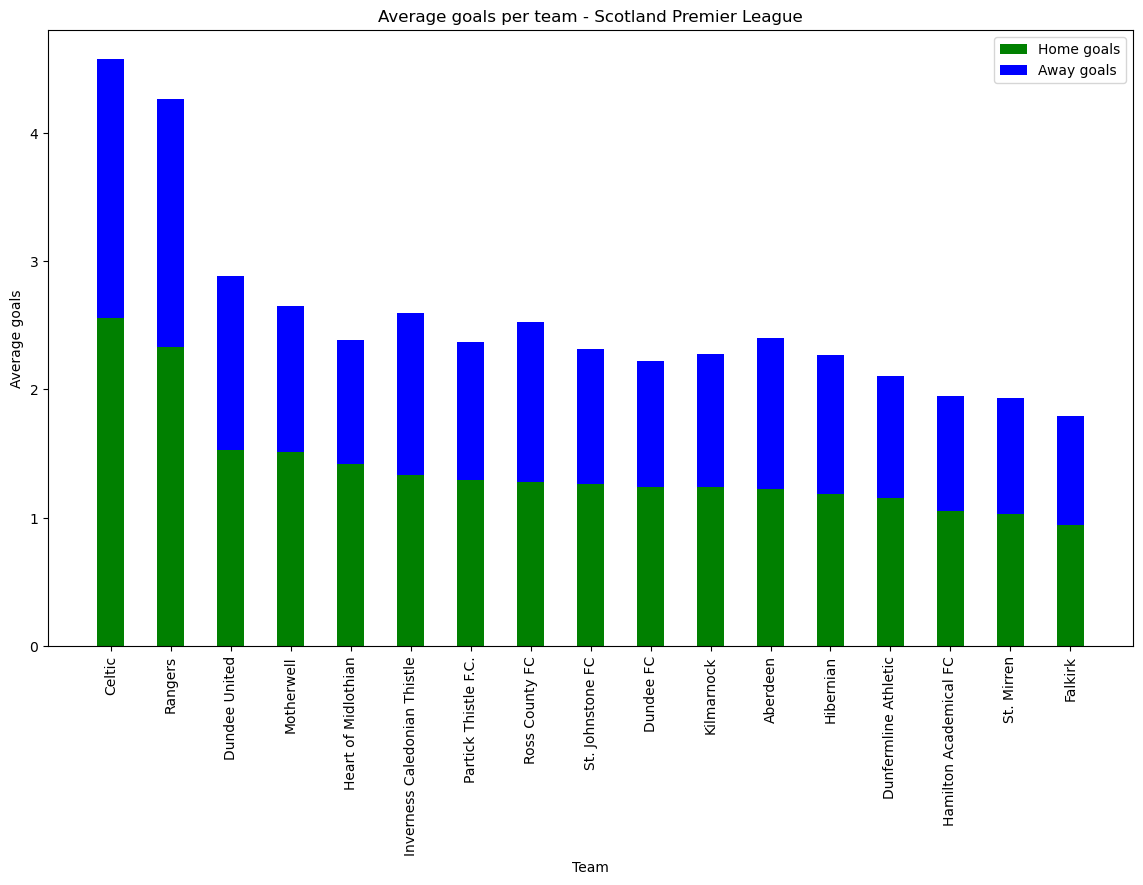

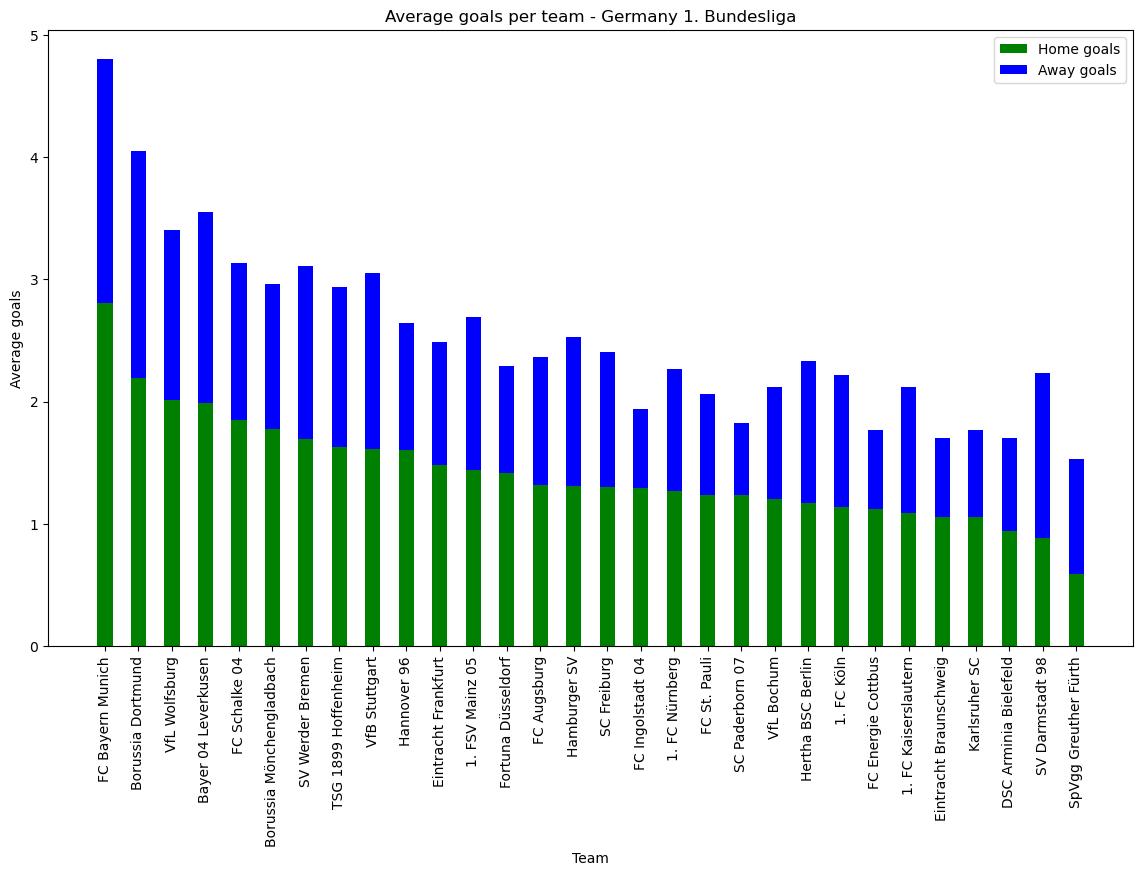

In [47]:

for league in ['Scotland Premier League', 'Germany 1. Bundesliga']:
    league_teams = team_goals[team_goals['league_name'] == league]
    league_teams = league_teams.sort_values('average_home_goals', ascending=False)

    plt.figure(figsize=(14, 8))
    bar_width = 0.45
    index = range(len(league_teams))

    p1 = plt.bar(index, league_teams['average_home_goals'], bar_width, label='Home goals', color='green')
    p2 = plt.bar(index, league_teams['average_away_goals'], bar_width, bottom=league_teams['average_home_goals'],
    label='Away goals', color='blue')

    plt.xlabel('Team')
    plt.ylabel('Average goals')
    plt.title(f'Average goals per team - {league}')
    plt.xticks(index, league_teams['team_long_name'], rotation=90)
    plt.legend()
    plt.show()

## Now It's your turn to continue!

**Now the turn changes, and it is your turn to do an initial study of the data. At the same time, remember what you wrote in the business understanding plan.**

This Jupyter Notebook file contains basic information so that you can access the data and continue to explore the data in a variety of ways. Also, be creative and don't limit yourself to the questions in the assignments. Finally, I would like to say that this assignment is significantly more challenging than the other assignment but much more rewarding.

There are no right or wrong answers to this assignment, but keep your answer compact and clear and focus on one league, based on the business understanding requirements you define in assignment 3.1.



In [74]:
# Filter matches for England Premier League and create a copy
epl_id = df_league[df_league['name'] == 'England Premier League']['id'].iloc[0]
df_epl = df_match[df_match['league_id'] == epl_id].copy()

# Basic overview of the EPL dataset
print(df_epl.shape)

# Descriptive statistics for goals
print(df_epl[['home_team_goal', 'away_team_goal']].describe())

# Average goals scored at home vs away
print(df_epl[['home_team_goal', 'away_team_goal']].mean())

# Derive match result
def match_result(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'Home Win'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'Away Win'
    else:
        return 'Draw'

# Add result column safely
df_epl.loc[:, 'result'] = df_epl.apply(match_result, axis=1)

# Distribution of match outcomes
print(df_epl['result'].value_counts(normalize=True) * 100)

# Team-level performance: average goals
home_perf = df_epl.groupby('home_team_api_id')['home_team_goal'].mean()
away_perf = df_epl.groupby('away_team_api_id')['away_team_goal'].mean()

team_perf = pd.concat([home_perf, away_perf], axis=1)
team_perf.columns = ['avg_home_goals', 'avg_away_goals']
print(team_perf.describe())

# Goal difference as a performance indicator
df_epl.loc[:, 'goal_difference'] = df_epl['home_team_goal'] - df_epl['away_team_goal']
print(df_epl['goal_difference'].describe())

# Missing values analysis (percentage)
missing_percent = (df_epl.isnull().sum() / len(df_epl)) * 100
print(missing_percent)


(3040, 115)
       home_team_goal  away_team_goal
count     3040.000000     3040.000000
mean         1.550987        1.159539
std          1.311615        1.144629
min          0.000000        0.000000
25%          1.000000        0.000000
50%          1.000000        1.000000
75%          2.000000        2.000000
max          9.000000        6.000000
home_team_goal    1.550987
away_team_goal    1.159539
dtype: float64
result
Home Win    45.723684
Away Win    28.519737
Draw        25.756579
Name: proportion, dtype: float64
       avg_home_goals  avg_away_goals
count       34.000000       34.000000
mean         1.414636        1.077862
std          0.387694        0.301667
min          0.894737        0.578947
25%          1.094737        0.945489
50%          1.323308        1.013158
75%          1.638158        1.182566
max          2.401316        1.756579
count    3040.000000
mean        0.391447
std         1.789165
min        -6.000000
25%        -1.000000
50%         0.000000
75%

The analysis focuses on the England Premier League, which was selected based on the business goal of understanding and explaining match outcomes for coaches and team analysts. The league provides a large number of matches and consistent data quality, making it suitable for statistical analysis.

Descriptive statistics show that home teams score more goals on average than away teams, confirming the existence of a home advantage. This finding is important for tactical planning, as it suggests that match location has a measurable impact on performance.

Match outcome distribution indicates that home wins are the most common result, followed by draws and away wins. This further supports the importance of home advantage as a key explanatory variable for match outcomes.

Team-level analysis reveals that teams generally score more goals at home than away, but the magnitude of this difference varies across teams. This variation highlights differences in team strength, tactical approaches, and consistency, which are relevant for opponent analysis and match preparation.

Goal difference analysis shows that most matches are decided by a small margin, indicating that the league is competitively balanced. Large goal differences are rare but provide strong signals of team dominance or defensive weakness.

Missing value analysis shows that core variables such as goals, teams, and match results are complete, while betting odds and match event data contain a higher proportion of missing values. This means the dataset is reliable for outcome and performance analysis, but some variables require careful handling in later phases.

Overall, the data supports the business objective of explaining match outcomes and identifying performance drivers. The findings provide a solid foundation for the next CRISP-DM phase, Data Preparation, where relevant features can be selected and refined for further analysis or modeling.